# A little EDA and nice visualisation gym for two rollercoaster datasets.

One dataset corresponds to wooden rollercoasters and the other to steel rollercoasters.

------

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [4]:
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


They both have the same features

In [5]:
(wood.dtypes == steel.dtypes).values.all() # also the data types match

True

In [6]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [7]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


No null values present

#### function to plot rollercoaster ranking over time

In [8]:
def plot_rank(name, df, *, figsize=None, ls=None, lw=None):
    if list(df.columns) != list(wood.columns):
        raise ValueError('Invalid frame')
        
    df = df.copy()
    df.drop_duplicates(subset=['Name', 'Year of Rank'], inplace=True)
    data = df.loc[df.Name == name, ['Year of Rank', 'Rank']]
    if figsize is None:
        figsize = (8, 5)
    if ls is None:
        ls = 'b-'
    if lw is None:
        lw = 5
    plt.figure(figsize=figsize)
    plt.plot(data['Year of Rank'], data['Rank'], ls, linewidth=lw, label=name)
    # plt.xticks(rotation=45)
    plt.legend()
    plt.title(f'{name}: ranking')
    plt.show()
    
            

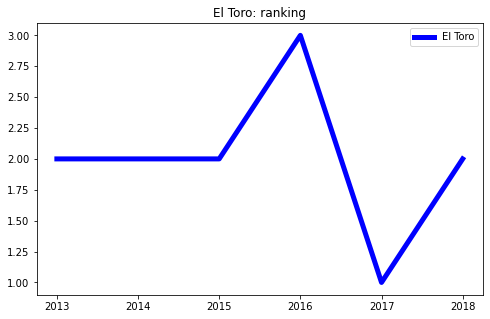

In [9]:
plot_rank('El Toro', wood)

In [10]:
def plot_twoRanks(name1, df1, name2, df2, figsize=None, *args):
    plot_rank(name1, df1, figsize=figsize)
    plot_rank(name2, df2, figsize=figsize)
    


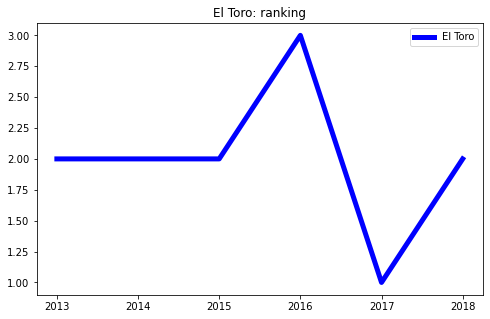

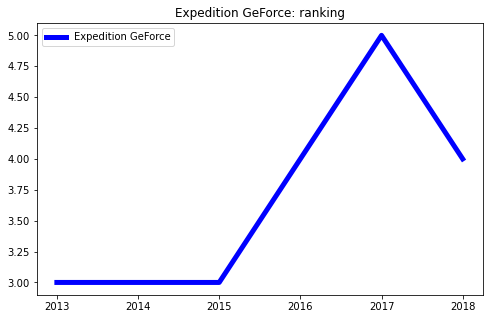

In [11]:
plot_twoRanks('El Toro', wood, 'Expedition GeForce', steel)

## Roller coasters

In [12]:
coasters = pd.read_csv('roller_coasters.csv')
coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [13]:
coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [14]:
import missingno as msno

coasters_num = coasters.select_dtypes(include=[np.number])
coasters_cat = coasters.select_dtypes(include=[object])
num_ft = coasters_num.columns
cat_ft = coasters_cat.columns

In [15]:
set(num_ft).intersection(set(cat_ft))

set()

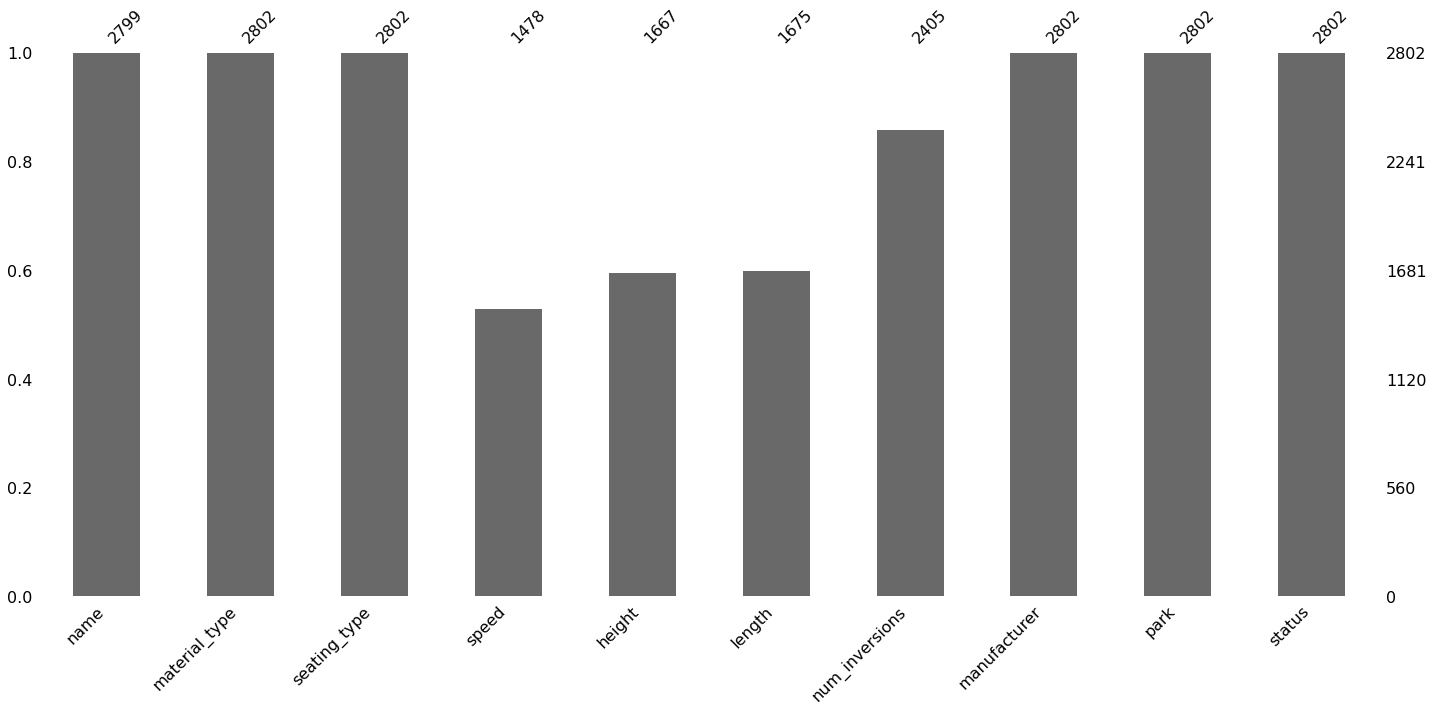

In [16]:
msno.bar(coasters)
plt.show()

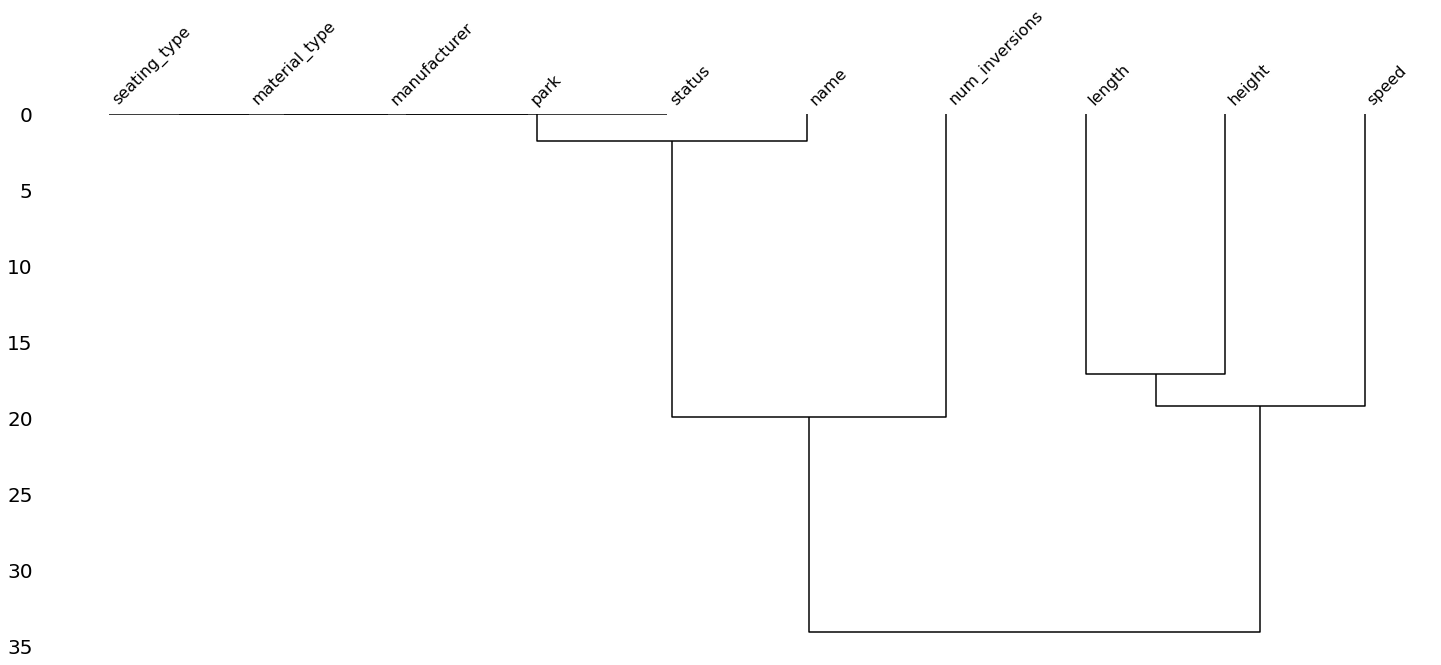

In [17]:
msno.dendrogram(coasters)
plt.show()

In [18]:
def hist_numerical(df):
    
    df = df.select_dtypes(include=[np.number])
    n = len(df.columns)
    plt.figure(figsize=(12, 8))
    for i, feat in enumerate(df.columns):
        plt.subplot(n//3 + 1, 3, i + 1)
        plt.hist(x=df[feat].values, bins=75, alpha=.5, ec='k', fc='steelblue')
    #df.hist( bins=75, figsize=(20, 20), lw=3, alpha=.5)
    plt.show()

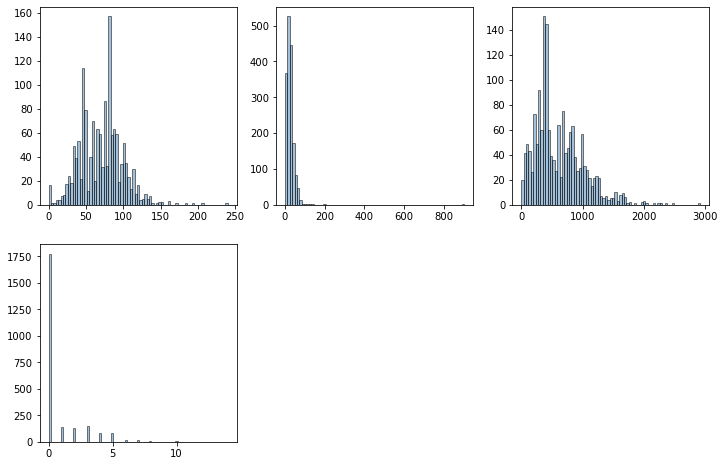

In [19]:
hist_numerical(coasters)

In [20]:
def num_inversions(df, amusement_park):
    df = df.loc[df.park == amusement_park]
    plt.figure(figsize=(10,8))
    plt.bar(range(df.name.nunique()), df.num_inversions.values)
    plt.gca().set_xticklabels(list(df.name.unique()))
    plt.show()
    
        

<ipython-input-20-7b452fde5394>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(list(df.name.unique()))


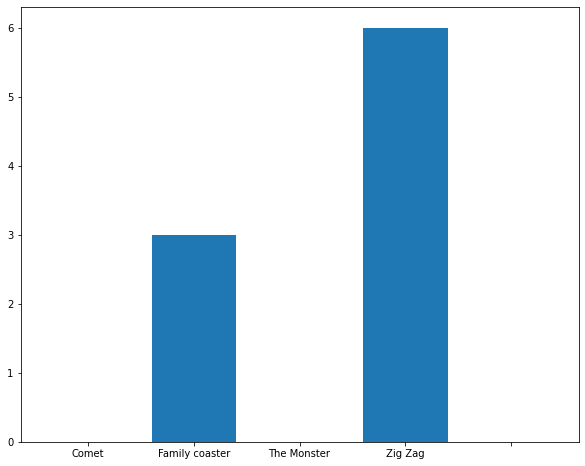

In [21]:
num_inversions(coasters, 'Walygator Parc' )

In [33]:
def roller_pie(df):
    data = df.status.value_counts().loc[['status.operating', 'status.closed.definitely']]
    plt.figure(figsize=(12, 9))
    plt.pie(data.values, labels=data.index.values, autopct='%.2f%%')
    plt.axis('equal')
    plt.show()


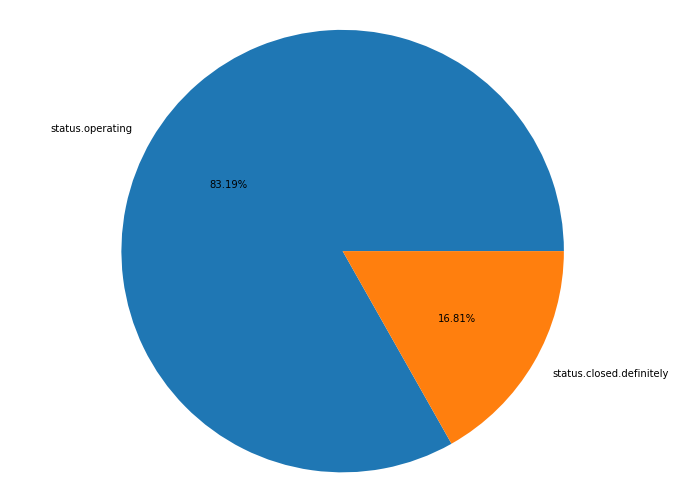

In [34]:
roller_pie(coasters)

In [49]:
def plot_scatter(df, col1, col2):
    first = df.loc[:, col1]
    second = df.loc[:, col2]
    plt.figure(figsize=(8, 5))
    plt.scatter(first, second, marker='H', alpha=.5)
    plt.xlabel(col1, fontsize=20)
    plt.ylabel(col2, fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()
    


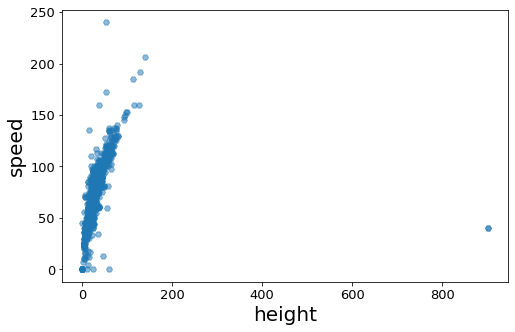

In [50]:
plot_scatter(coasters, 'height', 'speed')

### what roller coaster seating type is most popular

In [85]:
plt.rcParams.update({'axes.labelsize': 16})

In [86]:
coasters.seating_type.value_counts()

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: seating_type, dtype: int64

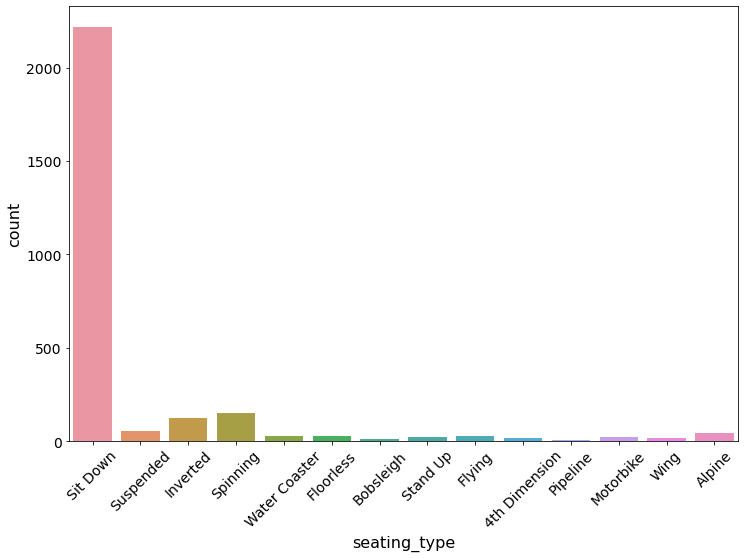

In [87]:
import seaborn as sns

coasters.seating_type.where(coasters.seating_type != 'na', np.nan, inplace=True)

plt.figure(figsize=(12, 8))
sns.countplot(data=coasters.dropna(axis=0, subset=['seating_type']), x='seating_type')
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [88]:
coasters.seating_type.where(coasters.seating_type != 'na', np.nan)

0        Sit Down
1       Suspended
2        Sit Down
3        Sit Down
4        Sit Down
          ...    
2797     Sit Down
2798     Spinning
2799     Sit Down
2800          NaN
2801     Sit Down
Name: seating_type, Length: 2802, dtype: object

### do different seating types result in higher/faster/longer roller coasters?

In [96]:
plt.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16})

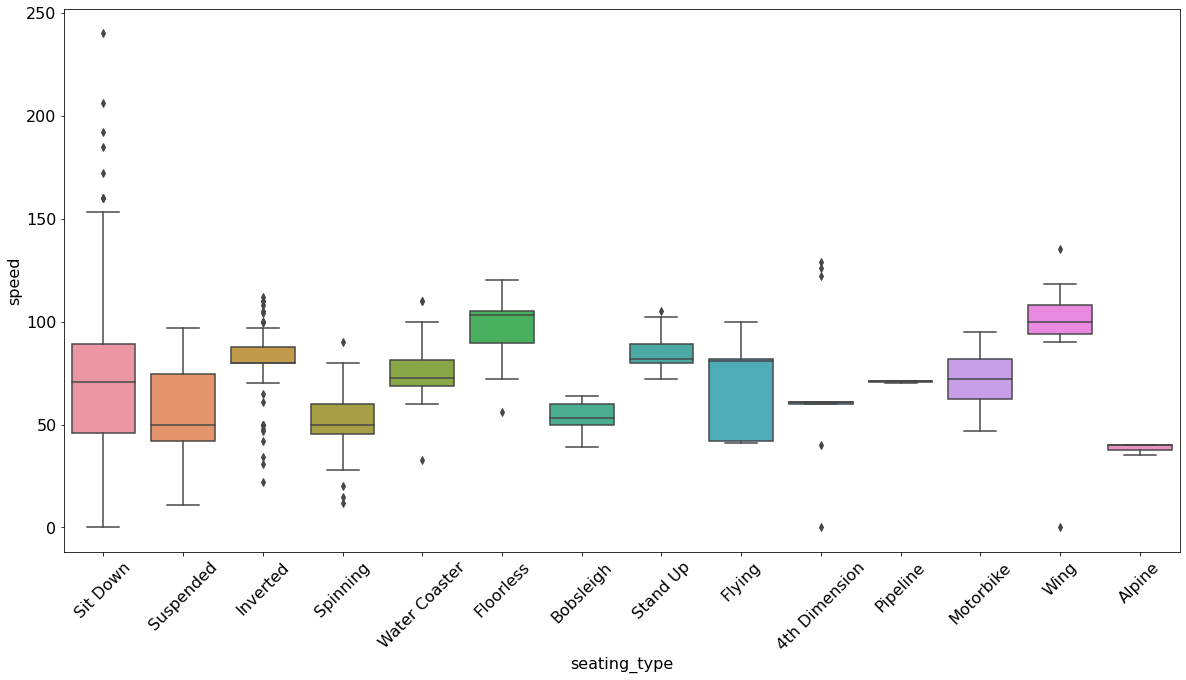

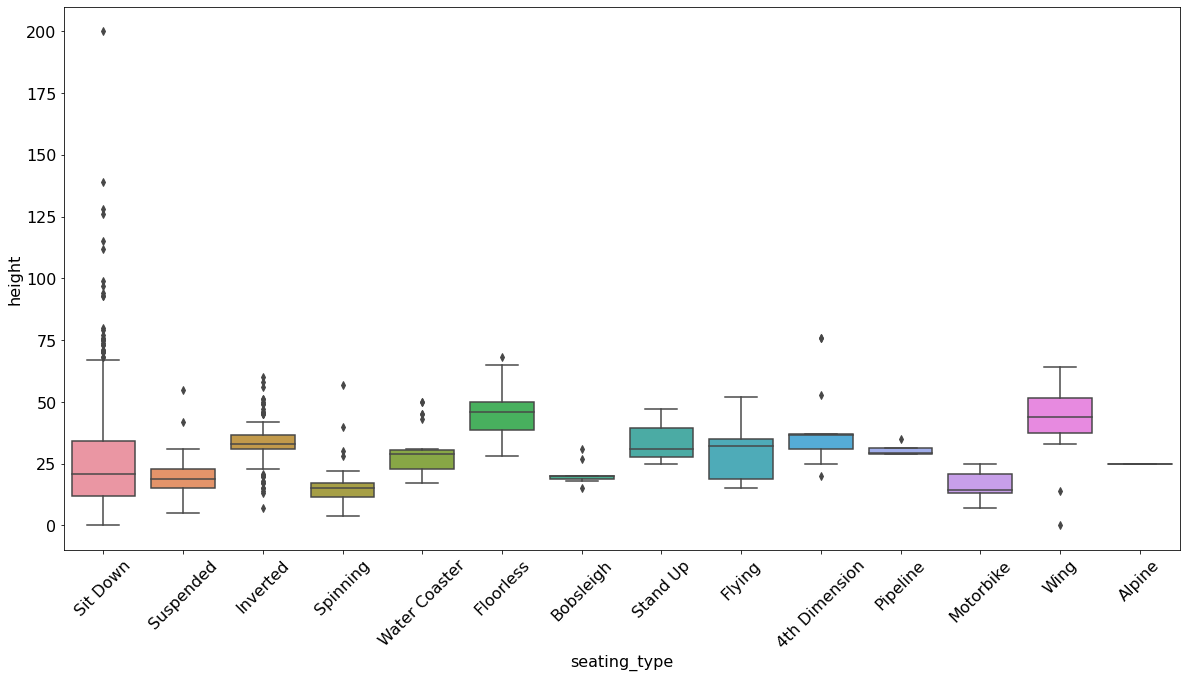

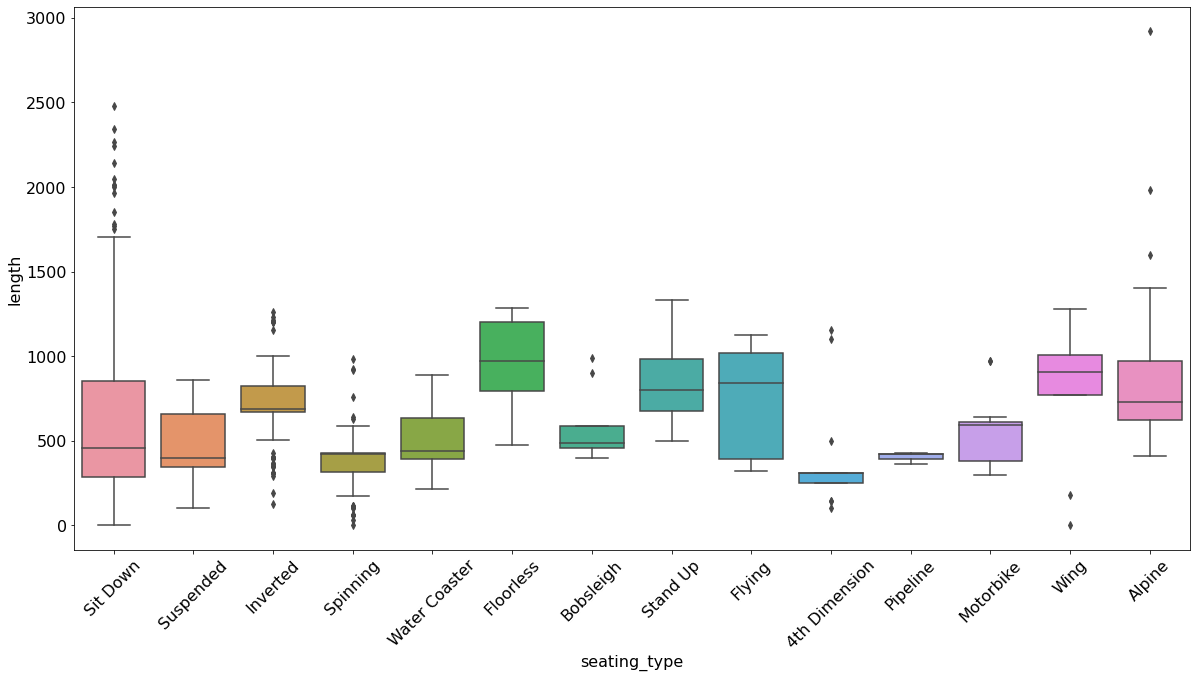

In [98]:
feats = ['speed', 'height', 'length']

for feature in feats:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=coasters, x='seating_type', y=feature)
    plt.gca().tick_params(axis='x', rotation=45)
    if feature == 'height':
        plt.gca().set_ylim(-10, 210)

plt.show()